In [1]:
# load selected feature
import numpy as np

X=np.loadtxt("data/WT_3s_X.txt")
X_scaled=np.loadtxt("data/WT_3s_X_scaled.txt")
Y=np.loadtxt("data/WT_3s_Y.txt")

print(X.shape)
print(X_scaled.shape)
print(Y.shape)

baseAcc = np.mean(Y==1) # this is baseline
print(baseAcc)

(44, 45)
(44, 45)
(44,)
0.8181818181818182


## The effect of scaling is significant!!

In [2]:
## Let's start from linear SVM 
from sklearn.svm import LinearSVC
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn import svm

##  without scaling!
clf = svm.LinearSVC(C=10, loss="hinge",  random_state=42)  # class_weight='balanced',

clf.fit(X,Y)

# training classfication error
Yhat = clf.predict(X)
print(np.mean(Y==Yhat))



## with scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge", random_state=42)), # class_weight='balanced', 
    ])

clf.fit(X,Y)

# training classfication error
Yhat = clf.predict(X)
print(np.mean(Y==Yhat))

## SCALING IS IMPORTANT!

0.9772727272727273
1.0


## Let's do cross-validation

In [3]:
## cross validation
from sklearn.model_selection import cross_val_score
from sklearn import svm

# linear classifier
clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge",  random_state=42)), # class_weight='balanced',
    ])

# run cross validation
scores = cross_val_score(clf, X, Y, cv=5)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.7        0.88888889 0.88888889 0.875      0.5       ]
Accuracy: 0.77 (+/- 0.31)


[0.74611111 0.74611111 0.74611111 0.74611111 0.74611111 0.74611111
 0.74611111 0.74611111 0.74611111 0.74611111 0.74611111 0.74611111
 0.74611111 0.74611111 0.74611111 0.74611111 0.74611111 0.74611111
 0.76611111 0.79555556 0.77055556 0.77055556 0.77055556 0.77055556
 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556
 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556
 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556]


Text(0,0.5,'accuracy')

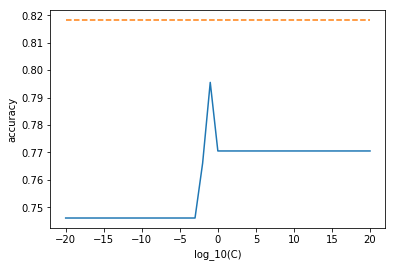

In [4]:
# repeat for a wide range of C
Cs = 10**np.linspace(-20,20,41)
Cs

k = 5
scores = list()
for C in Cs:
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=C, loss="hinge",  random_state=42)), # class_weight='balanced',
    ])

    scores.append(cross_val_score(clf, X, Y, cv=k))
    
#scores

mean_scores = np.mean(scores,axis=1)
print(mean_scores)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.log10(Cs),mean_scores)
plt.plot(np.log10(Cs), baseAcc*np.ones_like(Cs), '--')
plt.xlabel('log_10(C)')
plt.ylabel('accuracy')
    


## Adding `balancing` 


[0.68166667 0.68166667 0.68166667 0.68166667 0.68166667 0.68166667
 0.68166667 0.68166667 0.68166667 0.68166667 0.68166667 0.68166667
 0.68166667 0.68166667 0.68166667 0.68166667 0.68166667 0.68166667
 0.68388889 0.68111111 0.77055556 0.77055556 0.77055556 0.77055556
 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556
 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556
 0.77055556 0.77055556 0.77055556 0.77055556 0.77055556]


Text(0,0.5,'accuracy')

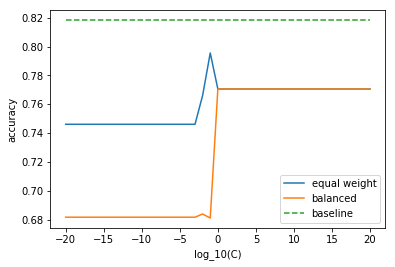

In [5]:
# repeat for a wide range of C
Cs = 10**np.linspace(-20,20,41)
Cs

k = 5
scores = list()
for C in Cs:
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=C, loss="hinge",  class_weight='balanced', random_state=42)),  # balanced!
    ])

    scores.append(cross_val_score(clf, X, Y, cv=k))
    
#scores

mean_scores_balanced = np.mean(scores,axis=1)
print(mean_scores_balanced)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.log10(Cs),mean_scores)
plt.plot(np.log10(Cs),mean_scores_balanced)
plt.plot(np.log10(Cs), baseAcc*np.ones_like(Cs), '--')
plt.legend(('equal weight','balanced', 'baseline'))
plt.xlabel('log_10(C)')
plt.ylabel('accuracy')
    

So, linear SVM does *NOT* work

## Nonlinear SVMs

1.0


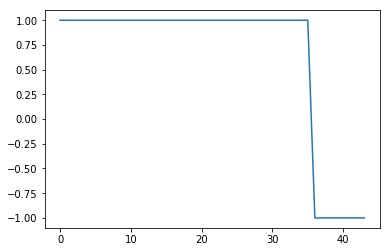

In [6]:
from sklearn.pipeline import Pipeline

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", svm.SVC(kernel="rbf", gamma=2, C=10,random_state=42))   # class_weight='balanced',
    ])
    
rbf_kernel_svm_clf.fit(X, Y)

Yhat=rbf_kernel_svm_clf.predict(X)
print(np.mean(Y==Yhat))
plt.plot(Yhat)

## Cross validation with nonlinear SVM

In [7]:
# repeat for a wide range of gamma and C

Gs=2**np.linspace(-7,3,11)
Gs
Cs = 10**np.linspace(-20,20,41)
Cs


# unbalanced 
k = 5
gs = list()
cs = list()
scores = list()
for G in Gs:
    print("gamma={}".format(G))
    for C in Cs:
        rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", svm.SVC(kernel="rbf", gamma=G, C=C,random_state=42))   # class_weight='balanced',
        ])
        gs.append(G)
        cs.append(C)
        scores.append(cross_val_score(rbf_kernel_svm_clf, X, Y, cv=k))


mean_scores = np.mean(scores,axis=1)
#print(mean_scores)    


maxIdx=np.argmax(mean_scores)
print("max accuracy = {} when gamma={} and C={}".format(mean_scores[maxIdx], gs[maxIdx], cs[maxIdx]))




# save results to files
np.savetxt("gamma.txt", gs)
np.savetxt("C.txt", Cs)
np.savetxt("scores.txt", scores)
np.savetxt("mean_scores.txt", mean_scores)


gamma=0.0078125
gamma=0.015625
gamma=0.03125
gamma=0.0625
gamma=0.125
gamma=0.25
gamma=0.5
gamma=1.0
gamma=2.0
gamma=4.0
gamma=8.0
max accuracy = 0.8905555555555555 when gamma=0.03125 and C=10.0


Text(0,0.5,'accuracy')

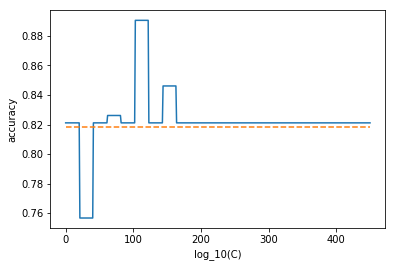

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mean_scores)
#plt.plot(np.log10(Cs), mean_scores)
plt.plot(baseAcc*np.ones_like(mean_scores), '--')
plt.xlabel('log_10(C)')
plt.ylabel('accuracy')

In [28]:
0.8905555555555555*9

8.015

## add balance

In [10]:
## add balance

Gs=2**np.linspace(-7,3,11)
Gs
Cs = 10**np.linspace(-20,20,41)
Cs


# unbalanced 
k = 5
gs = list()
cs = list()
scores_balanced = list()
for G in Gs:
    print("gamma={}".format(G))
    for C in Cs:
        rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", svm.SVC(kernel="rbf", gamma=G, C=C, class_weight='balanced', random_state=42))   # ,
        ])
        gs.append(G)
        cs.append(C)
        scores_balanced.append(cross_val_score(rbf_kernel_svm_clf, X, Y, cv=k))


mean_scores_balanced = np.mean(scores_balanced,axis=1)
#print(mean_scores)    


maxIdx=np.argmax(mean_scores_balanced)
print("max accuracy = {} when gamma={} and C={}".format(mean_scores_balanced[maxIdx], gs[maxIdx], cs[maxIdx]))




# save results to files
np.savetxt("gamma_balanced.txt", gs)
np.savetxt("C_balanced.txt", Cs)
np.savetxt("scores_balanced.txt", scores_balanced)
np.savetxt("mean_scores_balanced.txt", mean_scores_balanced)


gamma=0.0078125
gamma=0.015625
gamma=0.03125
gamma=0.0625
gamma=0.125
gamma=0.25
gamma=0.5
gamma=1.0
gamma=2.0
gamma=4.0
gamma=8.0
max accuracy = 0.8905555555555555 when gamma=0.03125 and C=1.0


Text(0,0.5,'accuracy')

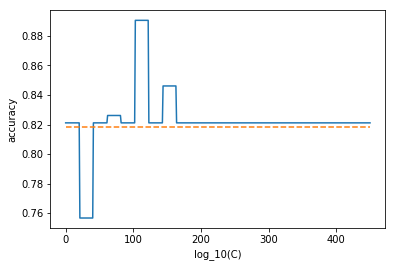

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mean_scores)
#plt.plot(np.log10(Cs), mean_scores)
plt.plot(baseAcc*np.ones_like(mean_scores), '--')
plt.xlabel('log_10(C)')
plt.ylabel('accuracy')

In [12]:
# refit using the best param
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", svm.SVC(kernel="rbf", gamma=0.03125, C=1, class_weight='balanced', random_state=42))   # ,
])

rbf_kernel_svm_clf.fit(X,Y)

# training error = 0
Yhat = rbf_kernel_svm_clf.predict(X)
np.mean(Yhat==Y)

1.0

In [58]:
# let's repeat & check confusion matrix!

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

split = StratifiedShuffleSplit(n_splits=5, test_size=1/5, random_state=42)

k = 0

acc_train = list()
acc_test = list()
for train_index, test_index in split.split(X,Y):
#    print(train_index)
#    print(test_index)
    if k==0:   # print info
        print("In the training set of size{},".format(Y[train_index].shape))
        print("cor: {}, incor: {}".format(sum(Y[train_index]==1),sum(Y[train_index]==-1)))
        print("In the training set of size{},".format(Y[test_index].shape))    
        print("cor: {}, incor: {}".format(sum(Y[test_index]==1),sum(Y[test_index]==-1)))
        baseAcc = sum(Y[test_index]==1) / (sum(Y[test_index]==1)+sum(Y[test_index]==-1)) 
        print("base accuracy = {}".format(baseAcc))

    X_train = X[train_index,:]
    Y_train = Y[train_index]
    X_test = X[test_index,:]    
    Y_test = Y[test_index]
    
    rbf_kernel_svm_clf.fit(X_train,Y_train)

    # training error
    Yhat_train = rbf_kernel_svm_clf.predict(X_train)
    acc_train.append(np.mean(Yhat_train==Y_train))

    # test error
    Yhat_test = rbf_kernel_svm_clf.predict(X_test)
    acc_test.append(np.mean(Yhat_test==Y_test))
 
    cm = confusion_matrix(Y_test, Yhat_test, labels=(1,-1))
    print(cm)

#     # let's manually check
#     print(sum((Y_test == 1) & (Yhat_test == 1)))    # 1s are (correctly) predicted as 1s
#     print(sum((Y_test == 1) & (Yhat_test == -1)))   # 1s are predicted as -1
#     print(sum((Y_test == -1) & (Yhat_test == 1)))   # -1s are predicted as 1
#     print(sum((Y_test == -1) & (Yhat_test == -1)))  # -1s are (correctly) predicted as -1

    
    k = k + 1
print("training accuracy")    
print(acc_train)
print("test accuracy")    
print(acc_test)
print(np.mean(acc_test))

In the training set of size(35,),
cor: 29, incor: 6
In the training set of size(9,),
cor: 7, incor: 2
base accuracy = 0.7777777777777778
[[7 0]
 [1 1]]
[[6 1]
 [0 2]]
[[7 0]
 [2 0]]
[[7 0]
 [1 1]]
[[7 0]
 [0 2]]
training accuracy
[1.0, 1.0, 1.0, 1.0, 1.0]
test accuracy
[0.8888888888888888, 0.8888888888888888, 0.7777777777777778, 0.8888888888888888, 1.0]
0.888888888888889


In [61]:
Yhat_test

array([ 1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.])

In [59]:
8/9

0.8888888888888888